# Part 1 :- Installing and Importing Important Libraries
---


 Step 1 :- Installing required Functions and Libraries

In [1]:
!pip install opendatasets
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install xgboost

Step 2 :- Importing required Functions and Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') ## to Avoid the filter warnings

# Part 2 :- Importing Dataset
---


In [3]:
dataset = "https://www.kaggle.com/datasets/mohidabdulrehman/laptop-price-dataset"
od.download(dataset)

Skipping, found downloaded files in ".\laptop-price-dataset" (use force=True to force download)


In [4]:
import os
data_dir = ".\\laptop-price-dataset"
os.listdir(data_dir)

['laptop_data.csv']

In [5]:
laptop_df = pd.read_csv(".\\laptop-price-dataset\laptop_data.csv")
laptop_df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
print(f'The Data Contains {laptop_df.shape[0]} rows & {laptop_df.shape[1]} columns.')

The Data Contains 1303 rows & 12 columns.


# Step 3 :- Data Preprocessing 
---

In [7]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [8]:
laptop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1303.0,651.000000,376.288010,0.00,325.50,651.00,976.5000,1302.00
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


1. Removing Unwanted Columns 

In [9]:
laptop_df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
laptop_df.drop(columns = ['Unnamed: 0'],inplace = True)

2. Removing Kg from the Weight column and Converting it into "float" column

In [11]:
laptop_df['Weight'] = laptop_df['Weight'].str.replace('kg', "")
laptop_df['Weight'] = laptop_df['Weight'].astype('float64')
laptop_df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


3. Removing GB from the Ram column and Converting it into "int" column

In [12]:
laptop_df['Ram'] = laptop_df['Ram'].str.replace('GB', "")
laptop_df['Ram'] = laptop_df['Ram'].astype('int64')
laptop_df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


4. Extracting The CPU Brand from the CPU Column

In [13]:
laptop_df['CpuName'] = laptop_df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [14]:
### User Defined Function to extract the CPU Brand

def fetch_brand(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [15]:
laptop_df['Processor_Brand'] = laptop_df['CpuName'].apply(fetch_brand)

### Removing Unwanted Columns

laptop_df.drop(columns = ['Cpu',"CpuName"],inplace = True)

laptop_df.head(1)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,Processor_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Intel Core i5


5. Extracting the Operating system name from OpSys column

In [16]:
laptop_df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [17]:
### Using str.repplace to replace windows10/10s/7 with windows

laptop_df['OpSys'] = laptop_df['OpSys'].str.replace("Windows 10",
                                                    'Windows OS').str.replace("Windows 10 S",
                                                                                           'Windows OS').str.replace("Windows 7",
                                                                                                                     'Windows OS').str.replace("Windows OS S",
                                                                                                                                               'Windows OS')
laptop_df['OpSys'] = laptop_df['OpSys'].str.replace("macOS",'Mac OS').str.replace("Mac OS X",'Mac OS')

laptop_df.rename(columns = {"OpSys":'OS'},inplace = True)
laptop_df.OS.unique()

array(['Mac OS', 'No OS', 'Windows OS', 'Linux', 'Android', 'Chrome OS'],
      dtype=object)

6. Extracting the GPU Brand fromthe GPU Column

In [18]:
laptop_df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [19]:
laptop_df['Gpu_Brand']  = laptop_df['Gpu'].apply(lambda x:x.split()[0])
laptop_df.drop(columns = ['Gpu'],inplace = True)

In [20]:
laptop_df.Gpu_Brand.value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_Brand, dtype: int64

7. Lets extract if there are any IPS displays from the Screen resolution

In [21]:
# Fetching touchscreen data from screenresolution column
laptop_df['IPS'] = laptop_df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)
laptop_df.head(1)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Mac OS,1.37,71378.6832,Intel Core i5,Intel,1


8. Lets Extract if there are any Touchscreen display from the Screen resolution Column

In [22]:
laptop_df['Touchscreen'] = laptop_df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)
laptop_df.head(1)

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,Mac OS,1.37,71378.6832,Intel Core i5,Intel,1,0


In [23]:
## Lets drop the Screen Resolution column since its of no use now 

laptop_df.drop(columns = ['ScreenResolution'],inplace = True)
laptop_df.head(2)

,Company,TypeName,Inches,Ram,Memory,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS,Touchscreen
0,Apple,Ultrabook,13.3,8,128GB SSD,Mac OS,1.37,71378.6832,Intel Core i5,Intel,1,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Mac OS,1.34,47895.5232,Intel Core i5,Intel,0,0


9. Processing the Memory Column

In [24]:
laptop_df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [25]:
laptop_df['Memory'] = laptop_df['Memory'].astype(str).replace('\.0', '', regex = True)

#Replacing GB to ''(null or empty)

laptop_df['Memory'] = laptop_df['Memory'].str.replace('GB', '')

#Replacing TB to 000 (1TB = 1000GB)

laptop_df['Memory'] = laptop_df['Memory'].str.replace('TB', '000')

In [26]:
dummy = laptop_df['Memory'].str.split('+', n=1,expand = True)

In [27]:
dummy.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
dtype: int64

In [28]:
laptop_df['zero'] = dummy[0]
laptop_df['one'] = dummy[1]
laptop_df.head(2)

,Company,TypeName,Inches,Ram,Memory,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS,Touchscreen,zero,one
0,Apple,Ultrabook,13.3,8,128 SSD,Mac OS,1.37,71378.6832,Intel Core i5,Intel,1,0,128 SSD,None
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Mac OS,1.34,47895.5232,Intel Core i5,Intel,0,0,128 Flash Storage,None


In [29]:
### Layer 0

laptop_df['H'] = laptop_df['zero'].apply(lambda x: 1 if 'HDD' in x else 0)
laptop_df['S'] = laptop_df['zero'].apply(lambda x: 1 if 'SSD' in x else 0)
laptop_df['zero'] = laptop_df['zero'].str.replace(r'\D', '')
laptop_df.head(2)

,Company,TypeName,Inches,Ram,Memory,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS,Touchscreen,zero,one,H,S
0,Apple,Ultrabook,13.3,8,128 SSD,Mac OS,1.37,71378.6832,Intel Core i5,Intel,1,0,128,None,0,1
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Mac OS,1.34,47895.5232,Intel Core i5,Intel,0,0,128,None,0,0


In [30]:
### Layer 1

laptop_df["one"].fillna("0", inplace = True)
laptop_df["H1"] = laptop_df["one"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["S1"] = laptop_df["one"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df['one'] = laptop_df['one'].str.replace(r'\D', '')
laptop_df.head(2)

,Company,TypeName,Inches,Ram,Memory,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS,Touchscreen,zero,one,H,S,H1,S1
0,Apple,Ultrabook,13.3,8,128 SSD,Mac OS,1.37,71378.6832,Intel Core i5,Intel,1,0,128,0,0,1,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Mac OS,1.34,47895.5232,Intel Core i5,Intel,0,0,128,0,0,0,0,0


In [31]:
laptop_df["zero"] = laptop_df["zero"].astype(int)
laptop_df["one"] = laptop_df["one"].astype(int)

In [32]:
laptop_df["HDD"]=(laptop_df["zero"]*laptop_df["H"]+laptop_df["one"]*laptop_df["H1"])
laptop_df["SSD"]=(laptop_df["zero"]*laptop_df["S"]+laptop_df["one"]*laptop_df["S1"])

In [33]:
### Dropping the unwanted columns 

laptop_df.drop(columns = ['zero','one','H',"S",'H1','S1'],inplace =True)
laptop_df.drop(columns = ["Memory"],inplace = True)
laptop_df.sample(5)

,Company,TypeName,Inches,Ram,OS,Weight,Price,Processor_Brand,Gpu_Brand,IPS,Touchscreen,HDD,SSD
341,Lenovo,Notebook,15.6,12,Windows OS,2.20,47898.72,AMD Processor,AMD,0,0,2000,0
1257,Dell,Notebook,15.6,4,Windows OS,2.29,26107.20,Intel Core i3,Intel,0,0,500,0
701,Lenovo,Notebook,15.6,4,Windows OS,2.20,21258.72,AMD Processor,AMD,0,0,0,256
500,Asus,Netbook,11.6,4,Windows OS,1.20,18115.20,Other Intel Processor,Intel,0,0,0,0
300,Asus,Notebook,14.0,4,Windows OS,1.30,27119.52,Intel Core i3,Intel,0,0,0,128


10. Reordering the Price Column for easier Modeling 

In [34]:
laptop_df['dum_Price'] = laptop_df['Price']
laptop_df.drop(columns = [ 'Price'],inplace = True)
laptop_df.rename(columns = {'dum_Price':"Price"},inplace = True)
laptop_df.head(5)

,Company,TypeName,Inches,Ram,OS,Weight,Processor_Brand,Gpu_Brand,IPS,Touchscreen,HDD,SSD,Price
0,Apple,Ultrabook,13.3,8,Mac OS,1.37,Intel Core i5,Intel,1,0,0,128,71378.6832
1,Apple,Ultrabook,13.3,8,Mac OS,1.34,Intel Core i5,Intel,0,0,0,0,47895.5232
2,HP,Notebook,15.6,8,No OS,1.86,Intel Core i5,Intel,0,0,0,256,30636.0000
3,Apple,Ultrabook,15.4,16,Mac OS,1.83,Intel Core i7,AMD,1,0,0,512,135195.3360
4,Apple,Ultrabook,13.3,8,Mac OS,1.37,Intel Core i5,Intel,1,0,0,256,96095.8080


In [35]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Ram              1303 non-null   int64  
 4   OS               1303 non-null   object 
 5   Weight           1303 non-null   float64
 6   Processor_Brand  1303 non-null   object 
 7   Gpu_Brand        1303 non-null   object 
 8   IPS              1303 non-null   int64  
 9   Touchscreen      1303 non-null   int64  
 10  HDD              1303 non-null   int64  
 11  SSD              1303 non-null   int64  
 12  Price            1303 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 132.5+ KB


# Step 4 :- Univariate Analysis
---

1. Checking the Skewness of Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

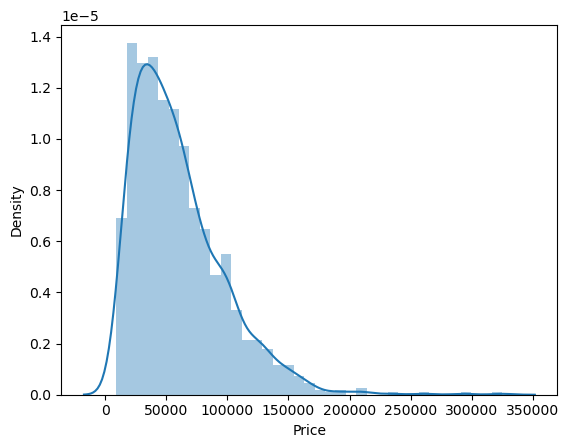

In [36]:
sns.distplot(laptop_df['Price'])

* The Price is Positively Skewed

2. Impact of Comapny On Price

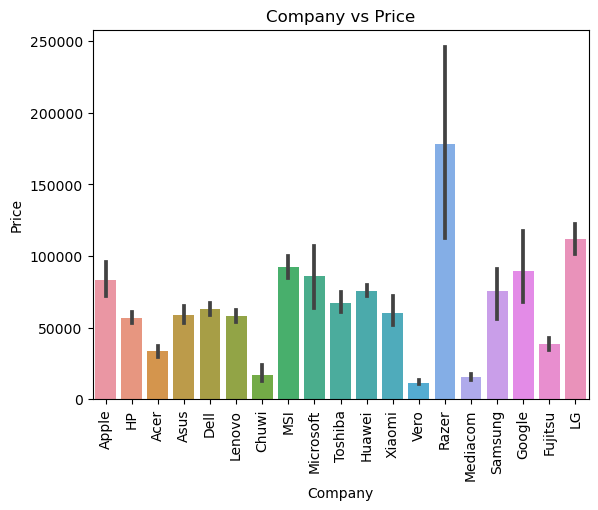

In [37]:
sns.barplot ( x = laptop_df['Company'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Company vs Price')
plt.show()

* The Razer company has Highest Priced laptop

3. Impact of Type of Laptop on Price

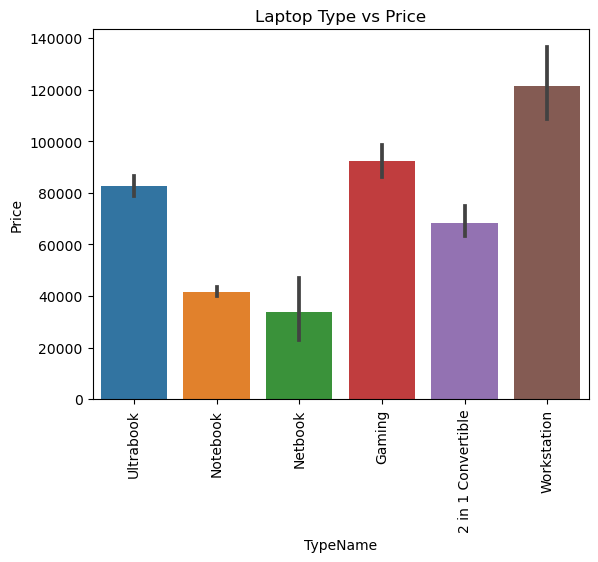

In [38]:
sns.barplot ( x = laptop_df['TypeName'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Laptop Type vs Price')
plt.show()

4. Impact of Ram on Price

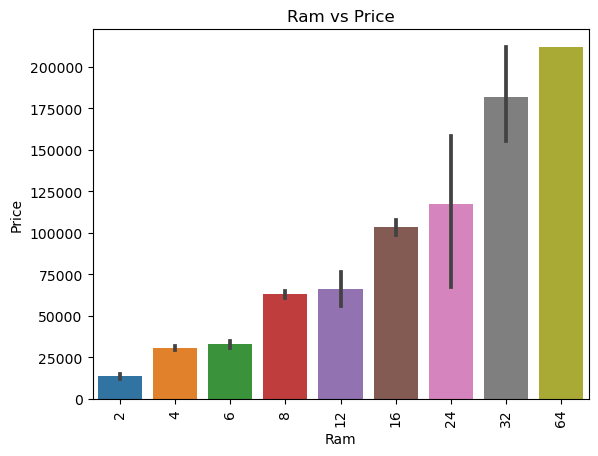

In [39]:
sns.barplot ( x = laptop_df['Ram'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Ram vs Price')
plt.show()

* As the Ram Increases the Price Increases

5. Impact of OS on Price

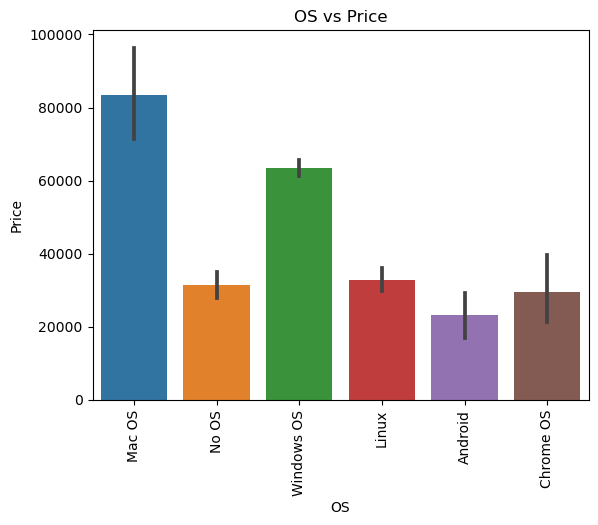

In [40]:
sns.barplot ( x = laptop_df['OS'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('OS vs Price')
plt.show()

* The laptop with MAC OS has the Highest Price Range

6. Impact of Inches on Price

<AxesSubplot:xlabel='Inches', ylabel='Price'>

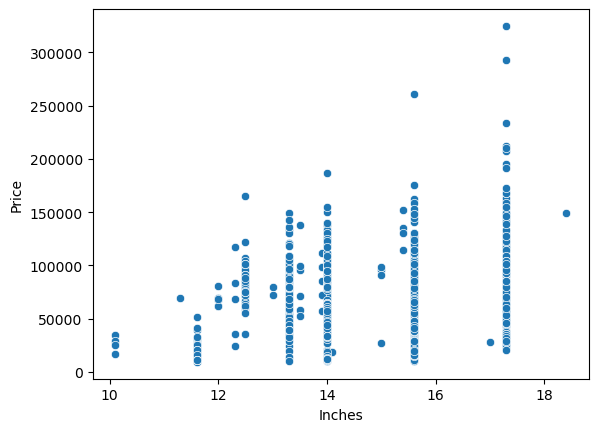

In [41]:
sns.scatterplot(x = laptop_df['Inches'], y = laptop_df['Price'])

* As the inches Increase the Price Increases 

7. Impact of Weight on Price

<AxesSubplot:xlabel='Weight', ylabel='Price'>

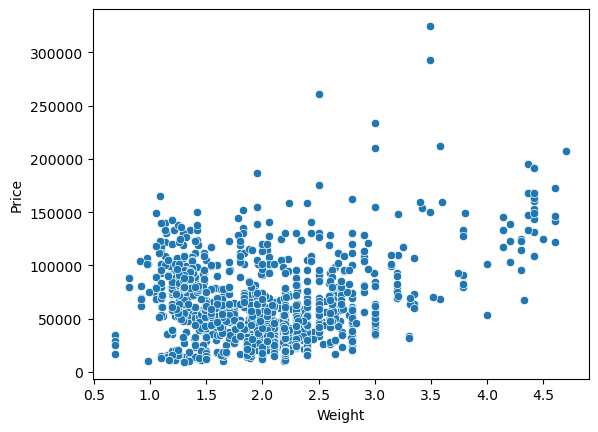

In [42]:
sns.scatterplot(x = laptop_df['Weight'], y = laptop_df['Price'])

* With an Increase in Weight the Price Increases

8. Imapct of Processor Brand on Price

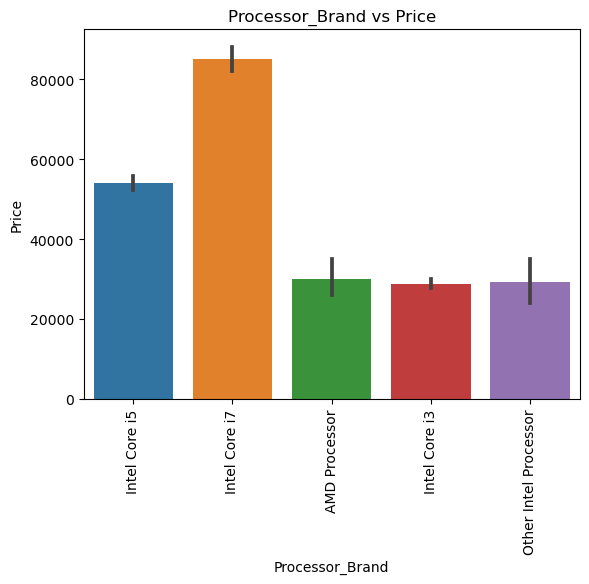

In [43]:
sns.barplot ( x = laptop_df['Processor_Brand'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Processor_Brand vs Price')
plt.show()

* Intel i5 and i7 has the highest prices

9. Impact of GPU Brand on Price 

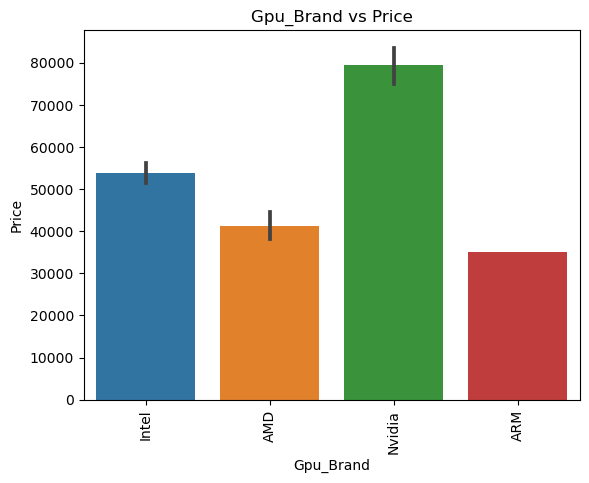

In [44]:
sns.barplot ( x = laptop_df['Gpu_Brand'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Gpu_Brand vs Price')
plt.show()

* The GPU_Brand named Nividia has the Highest Price

10. Impact of IPS and Touchscreen on Price

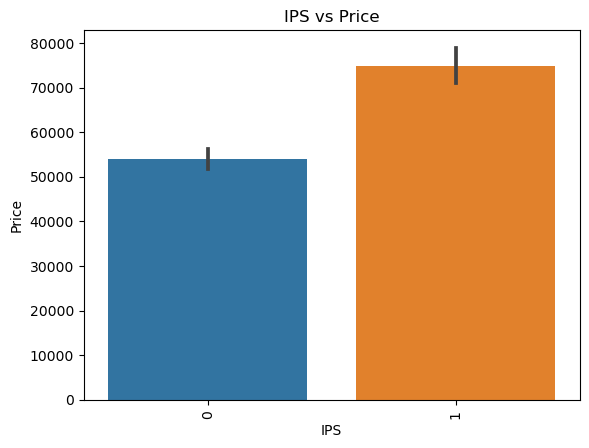

In [45]:
sns.barplot( x = laptop_df['IPS'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('IPS vs Price')
plt.show()

* The Lapotps with IPS displays have a higher Price

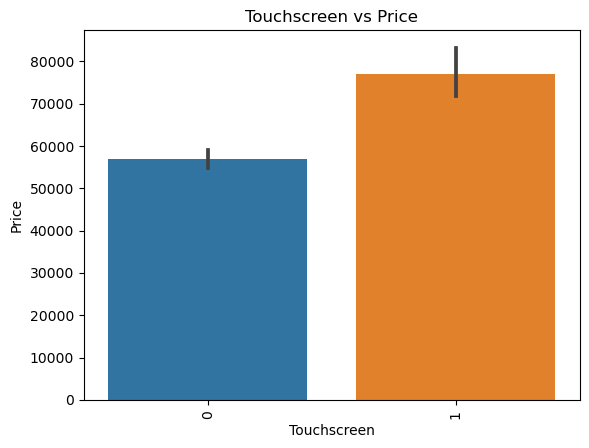

In [46]:
sns.barplot ( x = laptop_df['Touchscreen'] ,y=laptop_df['Price'])
plt.xticks(rotation = 'vertical')
plt.title('Touchscreen vs Price')
plt.show()

* The Laptops with Touchscreen displays have higher Price

11. Lets Log the Price column to Normalise it 

<AxesSubplot:xlabel='Price', ylabel='Density'>

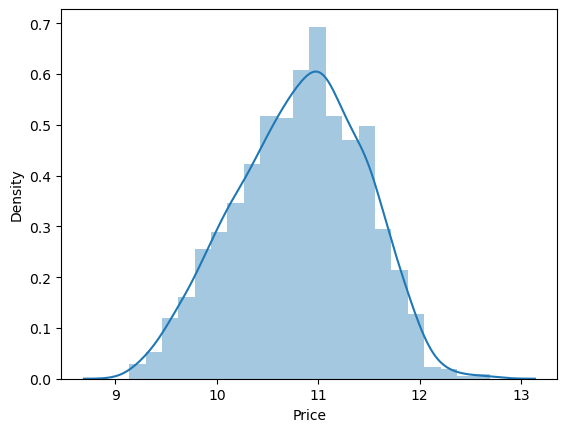

In [47]:
sns.distplot(np.log(laptop_df['Price']))

In [48]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Ram              1303 non-null   int64  
 4   OS               1303 non-null   object 
 5   Weight           1303 non-null   float64
 6   Processor_Brand  1303 non-null   object 
 7   Gpu_Brand        1303 non-null   object 
 8   IPS              1303 non-null   int64  
 9   Touchscreen      1303 non-null   int64  
 10  HDD              1303 non-null   int64  
 11  SSD              1303 non-null   int64  
 12  Price            1303 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 132.5+ KB


In [49]:
laptop_df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
IPS            0.252208
Touchscreen    0.191226
HDD           -0.096441
SSD            0.670799
Price          1.000000
Name: Price, dtype: float64

In [50]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Ram              1303 non-null   int64  
 4   OS               1303 non-null   object 
 5   Weight           1303 non-null   float64
 6   Processor_Brand  1303 non-null   object 
 7   Gpu_Brand        1303 non-null   object 
 8   IPS              1303 non-null   int64  
 9   Touchscreen      1303 non-null   int64  
 10  HDD              1303 non-null   int64  
 11  SSD              1303 non-null   int64  
 12  Price            1303 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 132.5+ KB


In [51]:
laptop_df.Processor_Brand.unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
       'Other Intel Processor'], dtype=object)

### Step 5 :- Model Buidling 
---

Lets create a checkpoint of the data to prevent from any loss

In [52]:
df_model = laptop_df
df_model.head()

,Company,TypeName,Inches,Ram,OS,Weight,Processor_Brand,Gpu_Brand,IPS,Touchscreen,HDD,SSD,Price
0,Apple,Ultrabook,13.3,8,Mac OS,1.37,Intel Core i5,Intel,1,0,0,128,71378.6832
1,Apple,Ultrabook,13.3,8,Mac OS,1.34,Intel Core i5,Intel,0,0,0,0,47895.5232
2,HP,Notebook,15.6,8,No OS,1.86,Intel Core i5,Intel,0,0,0,256,30636.0000
3,Apple,Ultrabook,15.4,16,Mac OS,1.83,Intel Core i7,AMD,1,0,0,512,135195.3360
4,Apple,Ultrabook,13.3,8,Mac OS,1.37,Intel Core i5,Intel,1,0,0,256,96095.8080


In [53]:
df_model = pd.DataFrame(df_model)

Step 1 :- Importing required packages

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.ensemble import RandomForestRegressor

Step 2 :- Declaring the x and y variables

In [55]:
x = df_model.drop(columns=['Price'])
y = np.log(df_model['Price'])

Step 3 :- Spliting the Data into train and test

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4321, test_size= 0.2)
len(x_train),len(x_test),len(y_train),len(y_test)

(1042, 261, 1042, 261)

Step 4 :- Fitting the Data into Different Models using PipeLine

1) Linear Regression 

In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1303 non-null   object 
 1   TypeName         1303 non-null   object 
 2   Inches           1303 non-null   float64
 3   Ram              1303 non-null   int64  
 4   OS               1303 non-null   object 
 5   Weight           1303 non-null   float64
 6   Processor_Brand  1303 non-null   object 
 7   Gpu_Brand        1303 non-null   object 
 8   IPS              1303 non-null   int64  
 9   Touchscreen      1303 non-null   int64  
 10  HDD              1303 non-null   int64  
 11  SSD              1303 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.3+ KB


In [58]:
### Checking the Accuracy with the Regression model

from sklearn.linear_model import LinearRegression

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,6,7])
])

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.670333355670597
MAE 0.2671884358377858


2) KNN

In [59]:
from sklearn.neighbors import KNeighborsRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])


step2 = KNeighborsRegressor(n_neighbors=3)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(x_train,y_train)

y_pred = pipe2.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.730283021474551
MAE 0.2493058362260975


3) Deision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])


step2 = DecisionTreeRegressor(max_depth=8)

pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe3.fit(x_train,y_train)

y_pred = pipe3.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7522847467156364
MAE 0.23838043385540883


4) Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
        ('col_tnf',OneHotEncoder
         (handle_unknown = 'ignore',sparse=False),[0,1,4,6,7])
])

step2 = RandomForestRegressor(n_estimators=1000,
                              random_state=3,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)

pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe4.fit(x,y)

y_pred = pipe4.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8207787693865873
MAE 0.20020420359667834


5) Extra trees Regressor

In [62]:
from sklearn.ensemble import ExtraTreesRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])

ExtraTreesRegressor(n_estimators=500,
                              random_state=3,
                              max_samples=1,
                              max_features=1,
                              max_depth=20)
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe5.fit(x_train,y_train)

y_pred = pipe5.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7544634169182995
MAE 0.23832133866460528


6) XgBoost

In [63]:

from xgboost import XGBRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(handle_unknown = 'ignore',sparse = False),[0,1,4,6,7])
])

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe6 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe6.fit(x_train,y_train)

y_pred = pipe6.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7610114143445849
MAE 0.23605717088487235


7) Gradient Boost

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])

step2 = GradientBoostingRegressor(n_estimators=1000)

pipe7 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe7.fit(x_train,y_train)

y_pred = pipe7.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7629370563744884
MAE 0.23681000446635803


8) AdaBoost

In [65]:
from sklearn.ensemble import AdaBoostRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])

step2 = AdaBoostRegressor(n_estimators=25,learning_rate=1.0)

pipe8 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe8.fit(x_train,y_train)

y_pred = pipe8.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6425166486165079
MAE 0.29983263902924157


9) Ridge and Lasso Regression 

In [66]:
from sklearn.linear_model import Ridge

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])

step2 = Ridge(alpha=10)

pipe9 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe9.fit(x_train,y_train)

y_pred = pipe9.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6750629440652363
MAE 0.2661043481354963


In [67]:
from sklearn.linear_model import Lasso

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])

step2 = Lasso(alpha=0.001)

pipe9 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe9.fit(x_train,y_train)

y_pred = pipe9.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6714004087161551
MAE 0.26726368386620447


10) Stacking Regressor

In [68]:
from sklearn.ensemble import StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_t',OneHotEncoder(sparse = False),[0,1,4,6,7])
])

estimators = [
    ('rf', RandomForestRegressor(n_estimators=500,random_state=5,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=200,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe10 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe10.fit(x_train,y_train)

y_pred = pipe10.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7371894968198892
MAE 0.24856488157271447


### The Random Forest Regressor gives the highest Accuracy i.e 82% 

### Step 6 :-  Exporting the Model using Pickle 
---

In [69]:
import pickle ## to Export Files

pickle.dump(df_model,open('Dataset.pkl','wb'))
pickle.dump(pipe4,open('rf_model.pkl','wb'))